In [17]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./data/microsoft.csv', index_col=0, parse_dates=True)

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


#### Estimate the average stock return with 90% Confidence Interval

In [12]:
df['logReturn'] = np.log(df['Close'].shift(-1)) - np.log(df['Close'])
df.head()

,Open,High,Low,Close,Adj Close,Volume,logReturn
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994


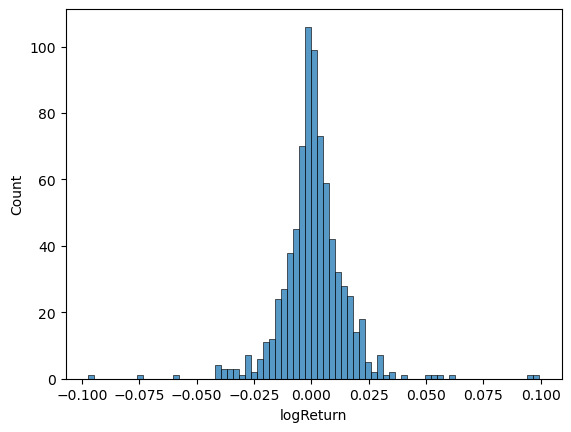

In [19]:
sns.histplot(df['logReturn'], kde=False)
plt.show()

In [14]:
sample_size = df['logReturn'].shape[0]
sample_mean = df['logReturn'].mean()
sample_std = df['logReturn'].std(ddof = 1) / sample_size ** 0.5

print(f"Sample Size: {sample_size}")
print(f"Sample Mean: {sample_mean}")
print(f"Sample STD: {sample_std}")

Sample Size: 780
Sample Mean: 0.0008202314861230223
Sample STD: 0.0005081514405458158


In [22]:
# left and right quartiles
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

# Upper and lower bound
interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std

In [25]:
print(f"Sample Mean is {sample_mean}")
print("********************************")
print("80% Confidence Interval is")
print(interval_left, interval_right)

Sample Mean is 0.0008202314861230223
********************************
80% Confidence Interval is
-1.560325389937862e-05 0.001656066226145423
